In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv('playgolf.csv')

# DecisionTreeClassifier cannot handle categorical data. so we will make the data numeric
le = LabelEncoder()
data['Outlook'] = le.fit_transform(data['Outlook'])
data['Temp'] = le.fit_transform(data['Temp'])
data['Humidity'] = le.fit_transform(data['Humidity'])
data['Windy'] = le.fit_transform(data['Windy'])
data['Play Golf'] = le.fit_transform(data['Play Golf'])

X = data.drop(columns=['Play Golf']) # because Play Golf is the label
Y = data['Play Golf']

clf = DecisionTreeClassifier()
clf.fit(X, Y)



DecisionTreeClassifier()

In [2]:
# today and tomorrow prediction
today = [2, 0, 1, 0] # sunny , cool , normal , false
tomorrow = [2, 1, 1, 0] # sunny , mild , normal , false

today = le.inverse_transform(clf.predict([today]))[0]
tomorrow = le.inverse_transform(clf.predict([tomorrow]))[0]

print('today:', today)
print('tomorrow:', tomorrow)

today: Yes
tomorrow: Yes


In [3]:
# accuracy on train set
prediction = le.inverse_transform(clf.predict(X))
print('prediction on trainSet:',prediction)

prediction on trainSet: ['No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'No']


In [4]:
train_accuracy = clf.score(X, Y)
print('Train accuracy:', train_accuracy)
# the model obviously overfits the data, we can handle this by making the tree shorter in depth

Train accuracy: 1.0


[Text(0.3333333333333333, 0.9, 'x[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.2222222222222222, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.4444444444444444, 0.7, 'x[2] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.2222222222222222, 0.5, 'x[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.3333333333333333, 0.3, 'x[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2222222222222222, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.5, 'x[3] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.5555555555555556, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.7777777777777778, 0.3, 'x[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.88888888

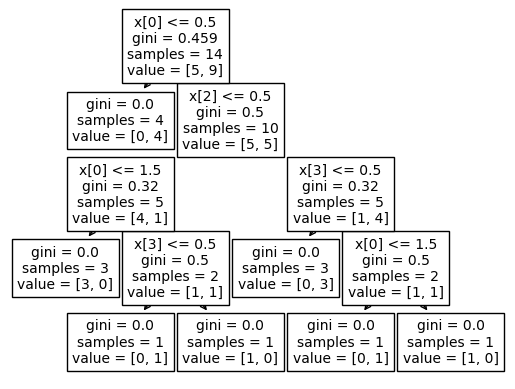

In [5]:
tree.plot_tree(clf)

In [6]:
# so we will make a shorter version of the tree

In [7]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, Y)


DecisionTreeClassifier(max_depth=3)

In [8]:
# today and tomorrow prediction
today = [2, 0, 1, 0] # sunny , cool , normal , false
tomorrow = [2, 1, 1, 0] # sunny , mild , normal , false

today = le.inverse_transform(clf.predict([today]))[0]
tomorrow = le.inverse_transform(clf.predict([tomorrow]))[0]

print('today:', today)
print('tomorrow:', tomorrow)

today: Yes
tomorrow: Yes


In [9]:
# accuracy on train set
prediction = le.inverse_transform(clf.predict(X))
print('prediction on trainSet:',prediction)
train_accuracy = clf.score(X, Y)
print('Train accuracy:', train_accuracy)
# 

prediction on trainSet: ['No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes'
 'No']
Train accuracy: 0.8571428571428571


[Text(0.375, 0.875, 'x[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.625, 'x[2] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.375, 'x[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.75, 0.375, 'x[3] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.875, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]')]

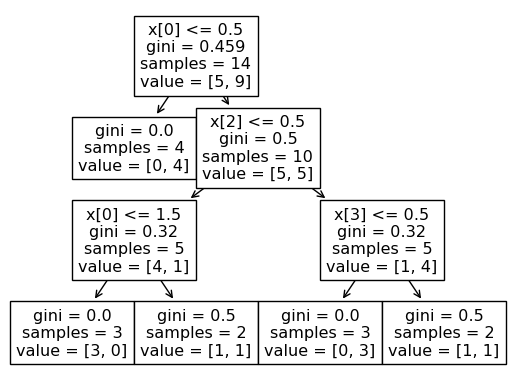

In [10]:
tree.plot_tree(clf)